In [2]:
# Import manual-wide dependencies
import os
import numpy as np
import deepmimo as dm
import matplotlib.pyplot as plt

# Load example scenario
scen_name = 'asu_campus_3p5'
dm.download(scen_name)
dataset = dm.load(scen_name)

Downloading: 100%|██████████| 29.1M/29.1M [00:14<00:00, 2.13MB/s]


✓ Downloaded to /Users/macbookm1/Documents/GitHub/Machine-Learning-Based-mmWave-Adaptive-Beamforming/beamforming/deepmimo_scenarios/asu_campus_3p5_downloaded.zip


Extracting: 100%|██████████| 25/25 [00:00<00:00, 116.03file/s]

✓ Unzipped and moved to /Users/macbookm1/Documents/GitHub/Machine-Learning-Based-mmWave-Adaptive-Beamforming/beamforming/deepmimo_scenarios
✓ Scenario 'asu_campus_3p5' ready to use!
Loading TXRX PAIR: TXset 1 (tx_idx 0) & RXset 0 (rx_idxs 131931)


In [3]:
dataset = dm.load('asu_campus_3p5')

ch_params = dm.ChannelParameters()
ch_params.bs_antenna.shape = [8, 1]

# for v3 compatibility
ch_params.ofdm.bandwidth = 50e6
ch_params.num_paths = 5

dataset.compute_channels(ch_params)
ch_params

Loading TXRX PAIR: TXset 1 (tx_idx 0) & RXset 0 (rx_idxs 131931)


Generating channels: 100%|██████████| 131931/131931 [00:02<00:00, 47325.59it/s]


{'bs_antenna': {'radiation_pattern': 'isotropic',
 'rotation': array([0, 0, 0]),
 'shape': array([8, 1]),
 'spacing': 0.5},
 'enable_doppler': 0,
 'freq_domain': 1,
 'num_paths': 5,
 'ofdm': {'bandwidth': 50000000.0,
 'rx_filter': 0,
 'selected_subcarriers': array([0]),
 'subcarriers': 512},
 'ue_antenna': {'radiation_pattern': 'isotropic',
 'rotation': array([0, 0, 0]),
 'shape': array([1, 1]),
 'spacing': 0.5}}

In [4]:
import textwrap
print("--- V4 Dataset Structure ---")


keys_v4 = list(key for key in dataset.keys() if not key.startswith('_'))

# Group keys by type
array_keys = [key for key in keys_v4 if isinstance(dataset[key], np.ndarray)]
dict_keys = [key for key in keys_v4 if hasattr(dataset[key], 'keys')]
other_keys = [key for key in keys_v4 if key not in array_keys + dict_keys]

# Print numpy arrays
print("\n=== Numpy Arrays ===")
for key in array_keys:
    print(f'dataset.{key}.shape: {dataset[key].shape}')

# Print dictionaries
print("\n=== Dictionaries ===")
for key in dict_keys:
    keys = dataset[key].keys()
    print(f'dataset.{key}: DotDict with {len(keys)} keys:')
    print('\t' + textwrap.fill(str(list(keys)), width=80, subsequent_indent='\t'))

# Print other types
print("\n=== Other Types ===")
for key in other_keys:
    print(f'dataset.{key}: {dataset[key]}')

--- V4 Dataset Structure ---

=== Numpy Arrays ===
dataset.aoa_az.shape: (131931, 10)
dataset.aoa_el.shape: (131931, 10)
dataset.aod_az.shape: (131931, 10)
dataset.aod_el.shape: (131931, 10)
dataset.power.shape: (131931, 10)
dataset.phase.shape: (131931, 10)
dataset.delay.shape: (131931, 10)
dataset.rx_pos.shape: (131931, 3)
dataset.tx_pos.shape: (1, 3)
dataset.inter.shape: (131931, 10)
dataset.inter_pos.shape: (131931, 10, 6, 3)
dataset.power_linear.shape: (131931, 10)
dataset.channel.shape: (131931, 1, 8, 1)

=== Dictionaries ===
dataset.txrx: DotDict with 3 keys:
	['tx_set_id', 'rx_set_id', 'tx_idx']
dataset.load_params: DotDict with 0 keys:
	[]
dataset.rt_params: DotDict with 22 keys:
	['raytracer_name', 'raytracer_version', 'frequency', 'max_path_depth',
	'max_reflections', 'max_diffractions', 'max_scattering', 'max_transmissions',
	'diffuse_reflections', 'diffuse_diffractions', 'diffuse_transmissions',
	'diffuse_final_interaction_only', 'diffuse_random_phases',
	'terrain_reflecti

In [5]:
# User sampling in v4
idxs = dataset.get_row_idxs(range(40, 50))
dataset_t = dataset.subset(idxs)
dataset_t.n_ue
dataset_t.channel.shape

(4110, 1, 8, 1)

In [6]:
# Like the information present in the scenario webpage
dm.summary('asu_campus_3p5')


DeepMIMO asu_campus_3p5 Scenario Summary

[Ray-Tracing Configuration]
- Ray-tracer: Remcom Wireless Insite v3.3
- Frequency: 3.5 GHz

[Ray-tracing parameters]

Main interaction limits
- Max path depth: 7
- Max reflections: 6
- Max diffractions: 1
- Max scatterings: 1
- Max transmissions: 0

Diffuse Scattering
- Diffuse scattering: Enabled
- Diffuse reflections: 2
- Diffuse diffractions: 1
- Diffuse transmissions: 0
- Final interaction only: True
- Random phases: False

Terrain
- Terrain reflection: True
- Terrain diffraction: False
- Terrain scattering: False

Ray Casting Settings
- Number of rays: 259,200
- Casting method: uniform
- Casting range (az): 360.0°
- Casting range (el): 180.0°
- Synthetic array: True

[Scene]
- Number of scenes: 1
- Total objects: 36
- Vertices: 516
- Faces: 332
- Triangular faces: 36

[Materials]
Total materials: 1

ITU Concrete 3.5 GHz:
- Permittivity: 5.31
- Conductivity: 0.09 S/m
- Scattering model: directive
- Scattering coefficient: 0.20
- Cross-pola

Loading TXRX PAIR: TXset 1 (tx_idx 0) & RXset 0 (rx_idxs 131931)


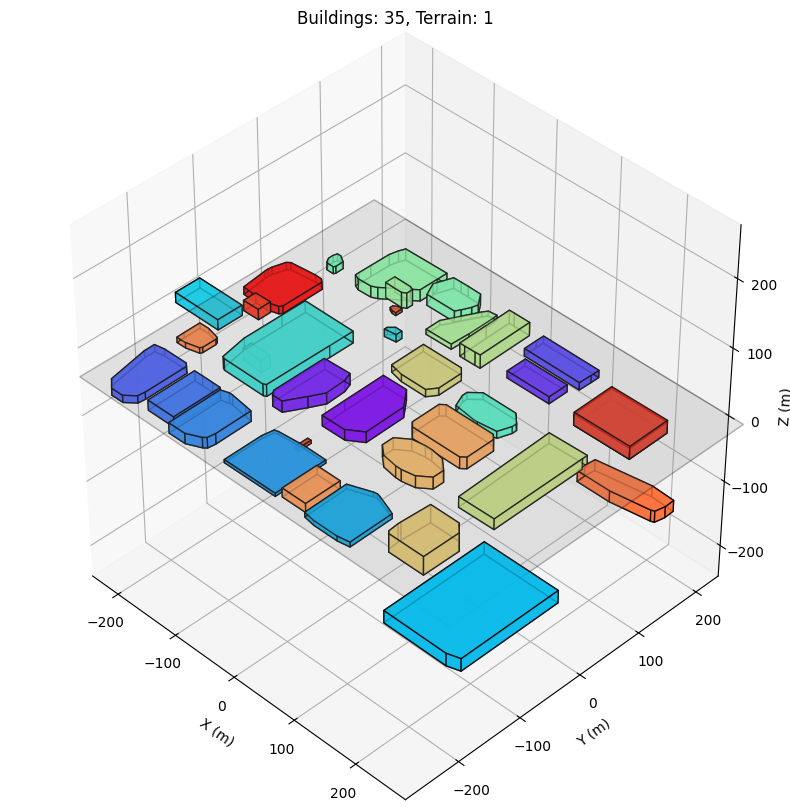

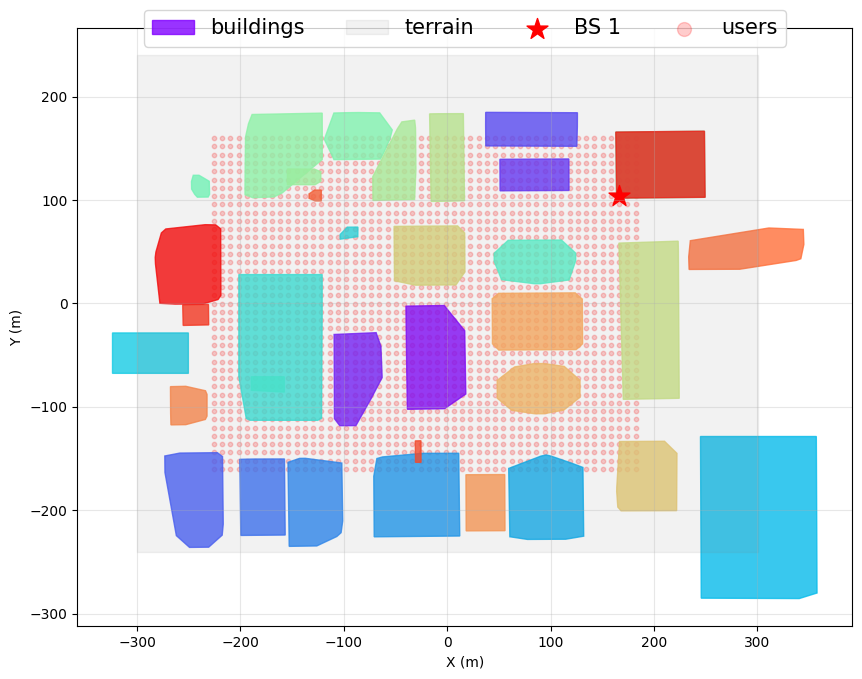

In [7]:
dm.plot_summary('asu_campus_3p5')

In [8]:
dm.info()


Fundamental Matrices:
power: Tap power. Received power in dBW for each path, assuming 0 dBW transmitted power. 
10*log10(|a|²), where a is the complex channel amplitude
	[num_rx, num_paths]
phase: Tap phase. Phase of received signal for each path in degrees. 
∠a (angle of a), where a is the complex channel amplitude
	[num_rx, num_paths]
delay: Tap delay. Propagation delay for each path in seconds
	[num_rx, num_paths]
aoa_az: Angle of arrival (azimuth) for each path in degrees
	[num_rx, num_paths]
aoa_el: Angle of arrival (elevation) for each path in degrees
	[num_rx, num_paths]
aod_az: Angle of departure (azimuth) for each path in degrees
	[num_rx, num_paths]
aod_el: Angle of departure (elevation) for each path in degrees
	[num_rx, num_paths]
inter: Type of interactions along each path
	Codes: 0: LOS, 1: Reflection, 2: Diffraction, 3: Scattering, 4: Transmission
	Code meaning: 121 -> Tx-R-D-R-Rx
	[num_rx, num_paths]
inter_pos: 3D coordinates in meters of each interaction point along p

In [9]:
# Get all available TX-RX sets
txrx_sets = dm.get_txrx_sets(scen_name)
print(txrx_sets)

[RXSet(name='rx_grid', id=0, points=131931), TXRXSet(name='BS', id=1, points=1)]


In [10]:
# Get all available TX to RX set pairs (pairs of rx sets to txs, not tx sets!)
pairs = dm.get_txrx_pairs(txrx_sets)
print(pairs)

[TxRxPair(tx=BS[0], rx=rx_grid), TxRxPair(tx=BS[0], rx=BS)]


In [11]:
dm.print_available_txrx_pair_ids(scen_name)


TX/RX Pair IDs
-------------------------
 Pair  | TX ID  | RX ID 
-------------------------
  0    |   1    |   0   
  1    |   1    |   1   
-------------------------


In [12]:
# This information is present in the scenario table and can be used to search and filter.
# (soon in dm.search())

# Get all available scenarios
scenarios = dm.get_available_scenarios()
print(f"Found {len(scenarios)} scenarios\n")

for scen_name in scenarios:
    params_json_path = dm.get_params_path(scen_name)

    # Skip if params file doesn't exist
    if not os.path.exists(params_json_path):
        print(f"Skipping {scen_name} - no params file found")
        continue

    params_dict = dm.load_dict_from_json(params_json_path)
    rt_params = params_dict[dm.consts.RT_PARAMS_PARAM_NAME]

    # Calculate sums
    max_reflections = rt_params[dm.consts.RT_PARAM_MAX_REFLECTIONS]
    max_diffractions = rt_params[dm.consts.RT_PARAM_MAX_DIFFRACTIONS]
    total_interactions = max_reflections + max_diffractions

    print(f"\nScenario: {scen_name}")
    print(f"Max Reflections: {max_reflections}")
    print(f"Max Diffractions: {max_diffractions}")
    print(f"Total Interactions: {total_interactions}")

Found 2 scenarios


Scenario: asu_campus_3p5
Max Reflections: 6
Max Diffractions: 1
Total Interactions: 7

Scenario: city_0_newyork_28
Max Reflections: 3
Max Diffractions: 1
Total Interactions: 4


In [13]:
dm.info()


Fundamental Matrices:
power: Tap power. Received power in dBW for each path, assuming 0 dBW transmitted power. 
10*log10(|a|²), where a is the complex channel amplitude
	[num_rx, num_paths]
phase: Tap phase. Phase of received signal for each path in degrees. 
∠a (angle of a), where a is the complex channel amplitude
	[num_rx, num_paths]
delay: Tap delay. Propagation delay for each path in seconds
	[num_rx, num_paths]
aoa_az: Angle of arrival (azimuth) for each path in degrees
	[num_rx, num_paths]
aoa_el: Angle of arrival (elevation) for each path in degrees
	[num_rx, num_paths]
aod_az: Angle of departure (azimuth) for each path in degrees
	[num_rx, num_paths]
aod_el: Angle of departure (elevation) for each path in degrees
	[num_rx, num_paths]
inter: Type of interactions along each path
	Codes: 0: LOS, 1: Reflection, 2: Diffraction, 3: Scattering, 4: Transmission
	Code meaning: 121 -> Tx-R-D-R-Rx
	[num_rx, num_paths]
inter_pos: 3D coordinates in meters of each interaction point along p

In [14]:
help(dm.plot_coverage)

Help on function plot_coverage in module deepmimo.generator.visualization:

plot_coverage(
    rxs: numpy.ndarray,
    cov_map: tuple[float, ...] | list[float] | numpy.ndarray,
    dpi: int = 100,
    figsize: tuple = (6, 4),
    cbar_title: str = '',
    title: bool | str = False,
    scat_sz: float = 0.5,
    bs_pos: Optional[numpy.ndarray] = None,
    bs_ori: Optional[numpy.ndarray] = None,
    legend: bool = False,
    lims: Optional[Tuple[float, float]] = None,
    proj_3D: bool = False,
    equal_aspect: bool = False,
    tight: bool = True,
    cmap: str | list = 'viridis',
    cbar_labels: Optional[list[str]] = None,
    ax: Optional[matplotlib.axes._axes.Axes] = None
) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes, matplotlib.colorbar.Colorbar]
    Generate coverage map visualization for user positions.

    This function creates a customizable plot showing user positions colored by
    coverage values, with optional base station position and orientation indica

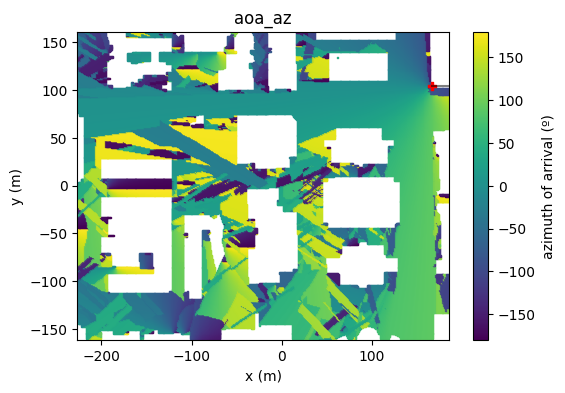

In [15]:
main_keys = ['aoa_az', 'aoa_el', 'aod_az', 'aod_el', 'delay', 'power', 'phase',
             'los', 'num_paths']

cbar_lbls = ['azimuth of arrival (º)', 'elevation of arrival (º)',
             'azimuth of departure  (º)', 'elevation of departure (º)',
             'delay (s)', 'power (dBW)', 'phase (º)', 'line-of-sight status', 'number of paths']

for key in main_keys:
    plt_var = dataset[key][:, 0] if dataset[key].ndim == 2 else dataset[key]
    # dm.plot_coverage(dataset.rx_pos, plt_var, bs_pos=dataset.tx_pos.T, title=key, cbar_title=cbar_lbls[main_keys.index(key)])
    dataset.plot_coverage(plt_var, title=key,
                          cbar_title=cbar_lbls[main_keys.index(key)])
    break

(<Figure size 600x400 with 2 Axes>,
 <Axes3D: title={'center': 'LoS'}, xlabel='x (m)', ylabel='y (m)', zlabel='z (m)'>,
 <matplotlib.colorbar.Colorbar at 0x127c97110>)

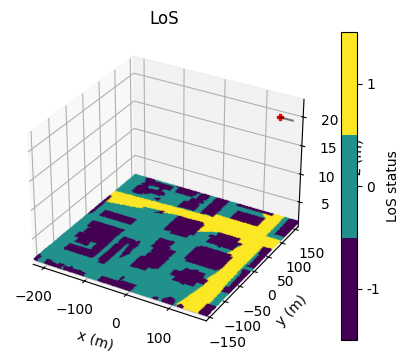

In [16]:
# 3D version
dm.plot_coverage(dataset.rx_pos, dataset['los'], bs_pos=dataset.tx_pos.T,
                 bs_ori=dataset.tx_ori, title='LoS', cbar_title='LoS status',
                 proj_3D=True, scat_sz=0.1)

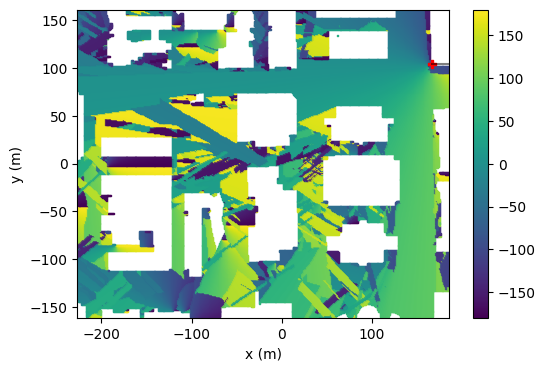

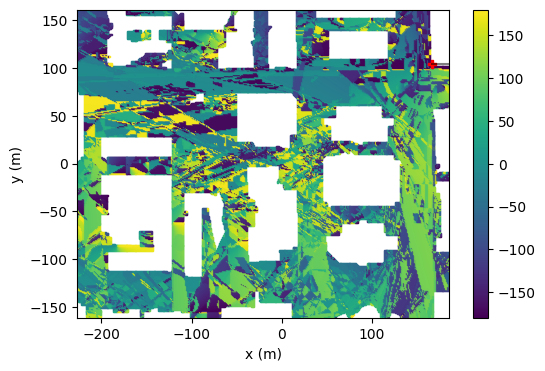

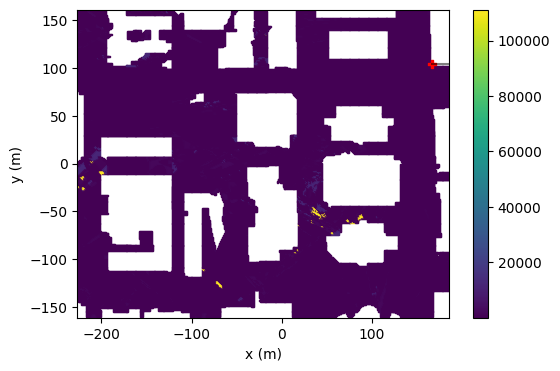

In [17]:
# Another shorter way of plotting
dataset.aoa_az.plot()
dataset.aoa_az.plot(path_idx=3)  # same as dataset.aoa_az[:,3].plot()
dataset.inter.plot(path_idx=3, interaction_idx=1)  # plot inter[:, 3, 1]

(<Figure size 1000x800 with 1 Axes>, <Axes: xlabel='x (m)', ylabel='y (m)'>)

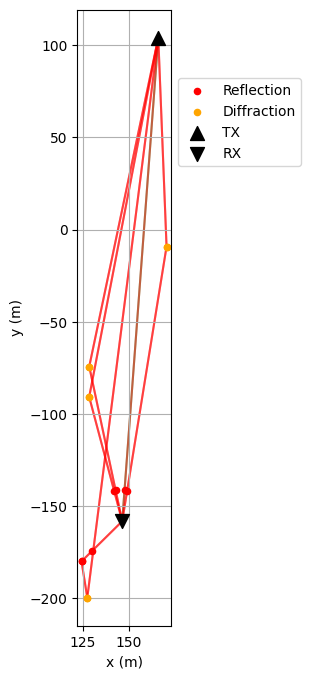

In [18]:
u_idx = np.where(dataset.los == 1)[0][100]
dataset.plot_rays(u_idx, proj_3D=False, dpi=100)

In [19]:
ch_params = dm.ChannelParameters()  # default array has 8 elements
ch_params.bs_antenna.rotation = np.array([0, 0, -135])
ch_params.bs_antenna.shape = np.array([32, 1])
dataset.compute_channels(ch_params)

n_beams = 16

beam_angles = np.around(np.linspace(-60, 60, n_beams), 2)
print(f'Beam angles: {beam_angles}')

# Compute Beamformers: F1 is [n_beams, n_ant]
F1 = np.array([dm.steering_vec(dataset.ch_params.bs_antenna.shape, phi=azi).squeeze()
               for azi in beam_angles])

# Apply beamformers
recv_bf_pwr_dbm = np.zeros((dataset.n_ue, n_beams)) * np.nan
mean_amplitude = np.abs(
    F1 @ dataset.channel[dataset.los != -1]).mean(axis=1).mean(axis=-1)
# Avg over rx antennas and subcarriers, respectively

# Convert to dBm
recv_bf_pwr_dbm[dataset.los != -
                1] = np.around(20*np.log10(mean_amplitude) + 30, 1)

Generating channels: 100%|██████████| 131931/131931 [00:02<00:00, 44147.51it/s]


Beam angles: [-60. -52. -44. -36. -28. -20. -12.  -4.   4.  12.  20.  28.  36.  44.
  52.  60.]


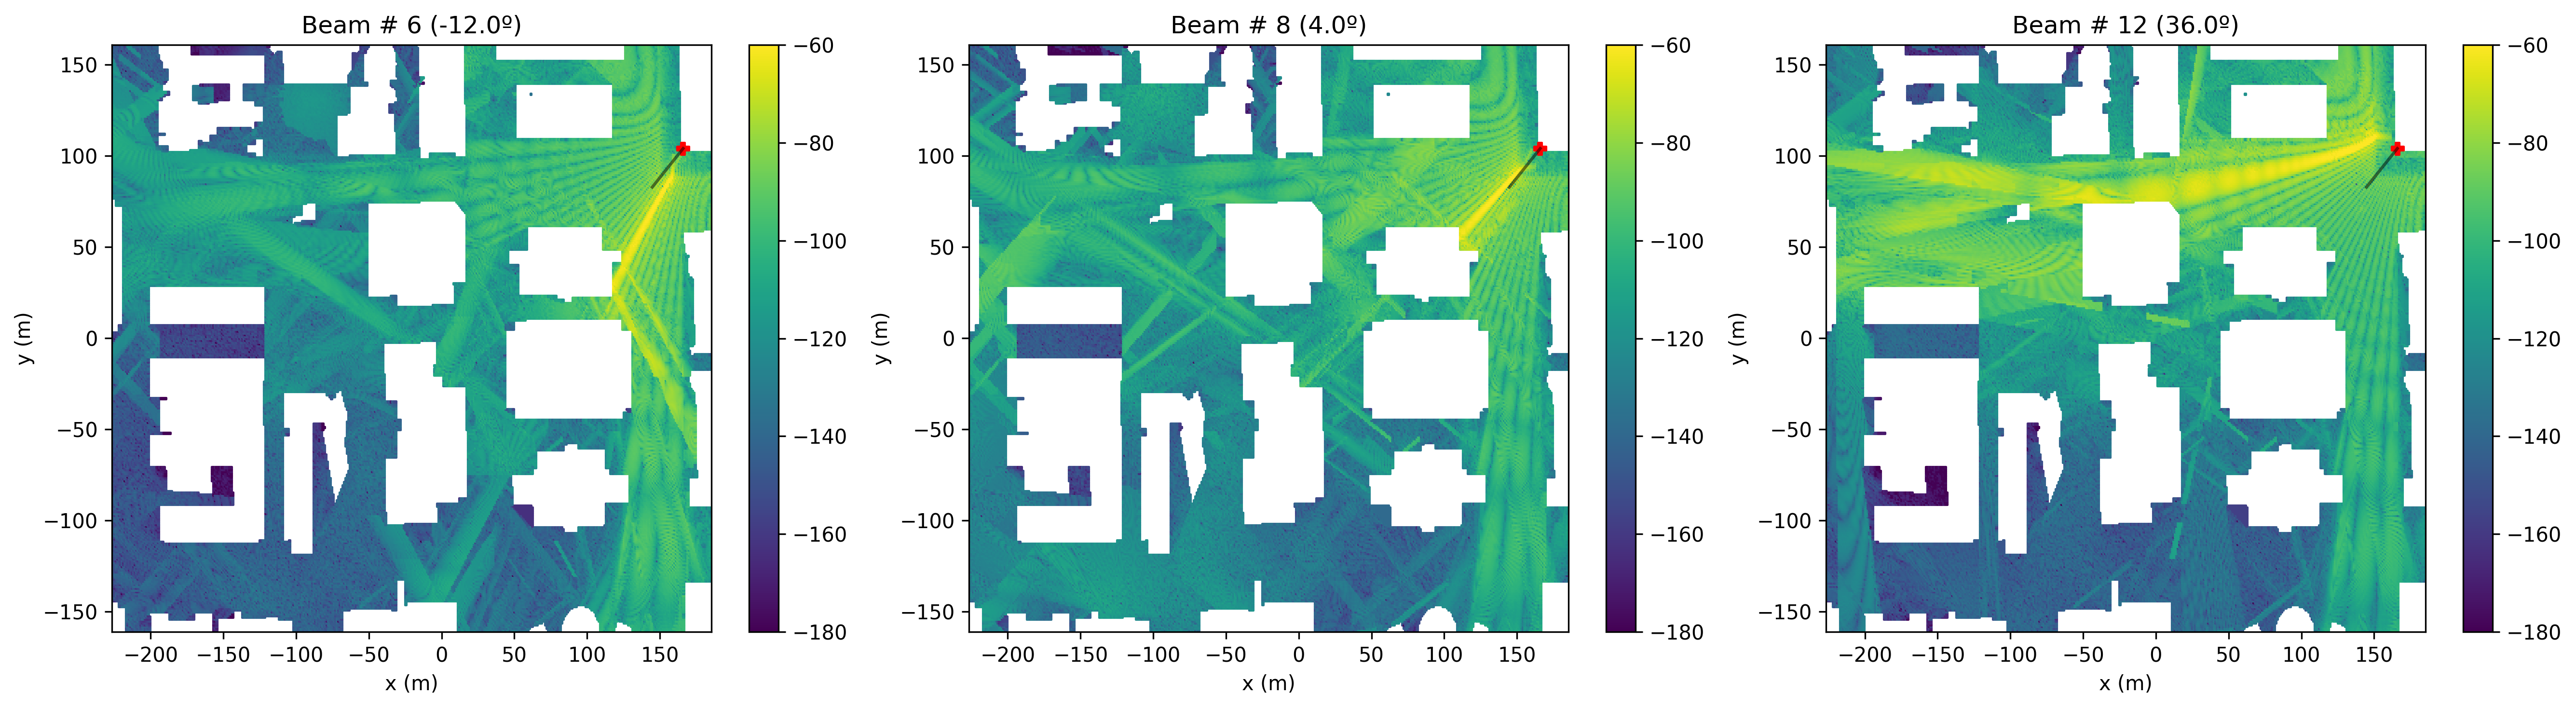

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=300, tight_layout=True)

for plt_idx, beam_idx in enumerate([6, 8, 12]):
    dataset.plot_coverage(recv_bf_pwr_dbm[:, beam_idx], ax=axes[plt_idx], lims=[-180, -60],
                          title=f'Beam # {beam_idx} ({beam_angles[beam_idx]:.1f}º)')

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Best Beams'}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x1134aead0>)

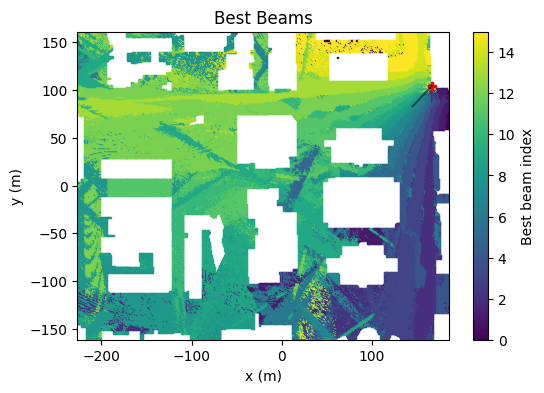

In [21]:
# Average the power on each subband and get the index of the beam that delivers max pwr
best_beams = np.argmax(recv_bf_pwr_dbm, axis=1).astype(float)
best_beams[np.isnan(recv_bf_pwr_dbm[:, 0])] = np.nan

dm.plot_coverage(dataset.rx_pos, best_beams, bs_pos=dataset.tx_pos.T, bs_ori=dataset.tx_ori,
                 title='Best Beams', cbar_title='Best beam index')

(<Figure size 600x400 with 2 Axes>,
 <Axes: title={'center': 'Best Beamformed Power (with grid of beams) '}, xlabel='x (m)', ylabel='y (m)'>,
 <matplotlib.colorbar.Colorbar at 0x113563610>)

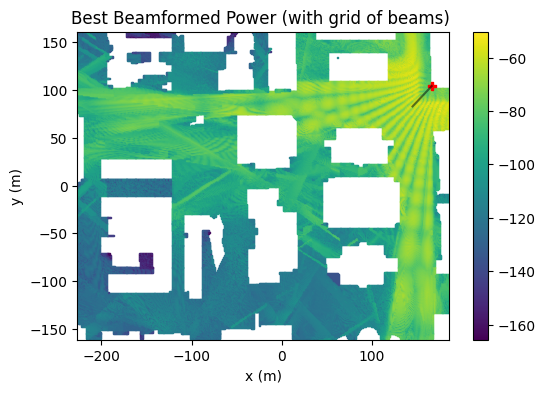

In [22]:
max_bf_pwr = np.max(recv_bf_pwr_dbm, axis=1)
dm.plot_coverage(dataset.rx_pos, max_bf_pwr, bs_pos=dataset.tx_pos.T, bs_ori=dataset.tx_ori,
                 title='Best Beamformed Power (with grid of beams) ')

In [26]:
print(dataset)

{'_aoa_az_rot': DeepMIMOArray([[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan]], shape=(131931, 10)),
 '_aoa_az_rot_fov': DeepMIMOArray([[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan]], shape=(131931, 10)),
 '_aoa_el_rot': DeepMIMOArray([[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
            

In [24]:
# Input features
X = np.hstack([dataset.rx_pos, dataset.tx_pos.T, dataset.aoa, dataset.aod])

# Target: Best beam index
y = np.argmax(recv_bf_pwr_dbm, axis=1)

KeyError: 'aoa'

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # For classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

KeyboardInterrupt: 

In [27]:
# Ensure tx_pos has the correct shape
# Repeat tx_pos for each receiver
tx_pos_repeated = np.tile(dataset.tx_pos.T, (dataset.rx_pos.shape[0], 1))

# Stack input features
X = np.hstack([dataset.rx_pos, tx_pos_repeated, dataset.aoa, dataset.aod])

# Handle NaN values in recv_bf_pwr_dbm
valid_indices = ~np.isnan(recv_bf_pwr_dbm).any(axis=1)  # Keep rows without NaN
X = X[valid_indices]
y = np.argmax(recv_bf_pwr_dbm[valid_indices], axis=1)

# Ensure X and y have matching dimensions
assert X.shape[0] == y.shape[0], "Mismatch between X and y dimensions"

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # For classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

KeyError: 'aoa'